In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

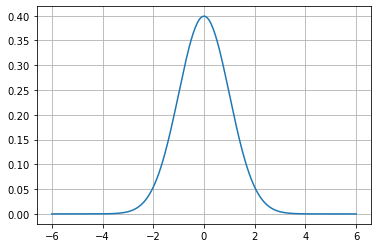

In [8]:
# First let us see how a normal distribution with 0 mean and standard deviation 2 looks like:
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
plt.grid()
plt.plot(xs, normal);

We see that this plot is perfectly centered around 0! This means it has no skewness.

# Skewness



In [11]:
# generate the x-values for which we will plot the distribution:
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-0.1), stats.lognorm.ppf(0.99, 0.7, loc=-0.1), 150)

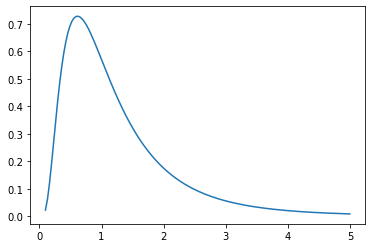

In [14]:
# Now, we generate positively skewed distribution:
lognormal = stats.lognorm.pdf(xs2, 0.7)
plt.plot(xs2, lognormal, label="Skew > 0");

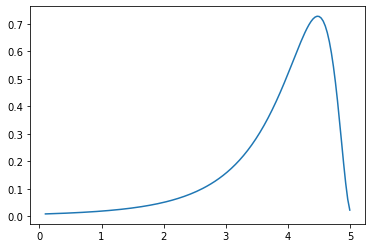

In [15]:
# Now, we generate negatively skewed distribution:
plt.plot(xs2, lognormal[::-1], label="Skew < 0");

In [17]:
# Let us look at the skewness of S&P 500 Returns for the year 2012-2014:
import pandas_datareader.data as web
import datetime as dt
start = dt.datetime(2012,1,1)
end = dt.datetime(2015,1,1)
df = web.DataReader('SPY', "yahoo", start, end)

In [19]:
# Let us add returns columns too:
df["returns"] = df["Adj Close"].pct_change()[1:]

In [20]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,106.331924,NaN
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,106.498711,0.001569
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,106.782272,0.002663
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,106.507057,-0.002577
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,106.765602,0.002427


In [29]:
returns = df["returns"][1:]

In [31]:
mean = np.mean(returns)
median = np.median(returns)
skewness = stats.skew(returns)

In [32]:
print(f"Skewness of Returns: {skewness}")
print(f"Mean of Returns: {mean}")
print(f"Median of Returns: {median}")

Skewness of Returns: -0.21021496482343988
Mean of Returns: 0.0007428053777798978
Median of Returns: 0.0007951016243694653


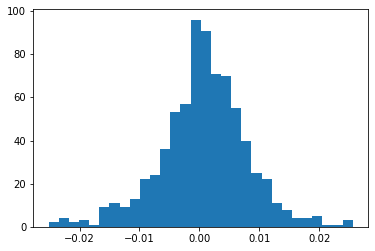

In [34]:
plt.hist(returns, bins=30);

# Kurtosis

It tells how much peaked a distribution is. All normal distributions regardless of their mean and variance have a kurtosis of 3. We look for kurtosis more than 3.
1. Kurtosis > 3: Such distributions are called leptokurtic and are highly peaked with fat tails.
2. Kurtosis < 3: Such distributions are called platykurtic 

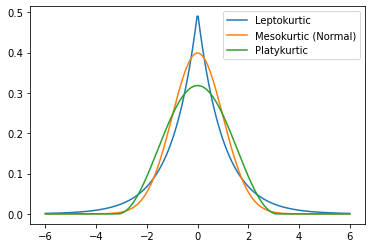

In [38]:
# Let us plot some distributions:
plt.plot(xs, stats.laplace.pdf(xs), label="Leptokurtic")
plt.plot(xs, normal, label="Mesokurtic (Normal)")
plt.plot(xs, stats.cosine.pdf(xs), label="Platykurtic")
plt.legend();

In [39]:
# Excess Kurtosis:
print(f"Excess kurtosis of returns: {stats.kurtosis(returns)}")

Excess kurtosis of returns: 1.2008131759259157


# Jarque-Bera Test 

This test helps us to see the similarity of the distribution we are trying to test with the normal distribution. Let us see how.

1. Null Hypothesis $H_{0}$: Returns come from a normal distribution
2. Alternative Hypothesis $H_{1}$: Returns do not come from a normal distribution

We take significance level $\alpha = 0.05$ When p-value is less than 0.05, then data is not from normal distribution and when p-value is more than 0.05, the data comes from a normal distribution

In [51]:
from statsmodels.stats.stattools import jarque_bera

# First, let us calibrate the test:
M = 1000
N = 1000
pvalues = np.ndarray((N))

# We generate N samples from a normal distribution:
for i in range(N):
    # and then we draw M samples from a normal distribution:
    X = np.random.normal(0, 1, M)
    _, pvalue, _, _ =  jarque_bera(X)
    pvalues[i] = pvalue

# count the number of pvalues below our default 0.05 (significance level):
num_significant = len(pvalues[pvalues<0.06])
print(float(num_significant)/N)

0.067


In [52]:
# now we run the test on our sample:
_, pvalue, _, _ = jarque_bera(returns)
if pvalue < 0.06:
    print("The returns are likely not normally distributed.")
else:
    print("The returns seem to be nornally distributed.")

The returns are likely not normally distributed.
